# Load the dataset

In [1]:
import pandas as pd
df = pd.read_csv("/home/t36668/projects/data-for-triage/d11101_1110131/feature_encoded/0301_clean.csv")
df.head()

age  bloodp1  bloodp2  pulse  breath  bodytemp  emve  emvm  emvv  referral  \
0   70      211      106     82      20        36     4     6     5         0   
1   89      132       76    125      20        38     4     6     5         0   
2   65      165       71     70      18        36     4     6     5         0   
3   95      128       65     83      20        36     4     6     5         0   
4   67      152       87     80      18        37     4     6     5         0   

   ...  全身無力  意識昏迷  食慾不振  低血糖  昏厥  heart disease  Cancer disease  \
0  ...     0     0     0    0   0              0               0   
1  ...     0     0     0    0   0              0               0   
2  ...     0     0     0    0   0              0               0   
3  ...     0     0     0    0   0              0               0   
4  ...     0     0     0    0   0              0               0   

   renal disease  liver disease  triage  
0              0              0       2  
1              0              0       2  
2              0              0       4  
3              0              0       2  
4              0              0       4  

[5 rows x 45 columns]

In [2]:
print(df.shape, df.columns)

target = ['triage']
feature_bins = df.columns[:-1]
print(feature_bins)
print(len(feature_bins))
print(len(df.columns))

data_input = df[feature_bins]
data_output = df[target].to_numpy().ravel()
print(data_input.shape, data_output.shape)

(12335, 45) Index(['age', 'bloodp1', 'bloodp2', 'pulse', 'breath', 'bodytemp', 'emve',
       'emvm', 'emvv', 'referral', '代訴', '呼吸短促', '意識不清', '發燒', '發現症狀時間 2022',
       '無力', '咳嗽', '頭暈', '胸痛', '全身', '嘔吐', '腹痛', '胸悶', '癲癇', '心悸', '右側',
       '口齒不清', '交通事故', '痙攣', '左側', '單側無力', '血壓低', '腹瀉', '上肢', '下肢', '全身無力',
       '意識昏迷', '食慾不振', '低血糖', '昏厥', 'heart disease', 'Cancer disease',
       'renal disease', 'liver disease', 'triage'],
      dtype='object')
Index(['age', 'bloodp1', 'bloodp2', 'pulse', 'breath', 'bodytemp', 'emve',
       'emvm', 'emvv', 'referral', '代訴', '呼吸短促', '意識不清', '發燒', '發現症狀時間 2022',
       '無力', '咳嗽', '頭暈', '胸痛', '全身', '嘔吐', '腹痛', '胸悶', '癲癇', '心悸', '右側',
       '口齒不清', '交通事故', '痙攣', '左側', '單側無力', '血壓低', '腹瀉', '上肢', '下肢', '全身無力',
       '意識昏迷', '食慾不振', '低血糖', '昏厥', 'heart disease', 'Cancer disease',
       'renal disease', 'liver disease'],
      dtype='object')
44
45
(12335, 44) (12335,)


# feature_importance_ for Random Forest Classifier
- If we want to know for all the models we can try it individually or by forloop

In [5]:
from sklearn.ensemble import RandomForestClassifier as RClf
import numpy as np


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.2, random_state=42)

model = RClf(n_estimators = 100)
mdl=model.fit(x_train, y_train)
#y_pred = model.predict(y_test)
importances = mdl.feature_importances_
for name, importance in zip(data_input.columns, mdl.feature_importances_):
    print(name, importance)
print(importances)
#std = np.std([t.feautre_importances_ for t in model.estimators_], axis = 0)

#indices = np.argsort(importances)[::-1]

#print('Feature Ranking:')

#for f in range(X.shape[1]):
#	print('%d. features %d (%f)'% (f+1, indices[f], importances[indices[f]]))

age 0.19390526546283998
bloodp1 0.1349247592144161
bloodp2 0.12208305727580497
pulse 0.13507522509366066
breath 0.07753823976151936
bodytemp 0.05086519232668002
emve 0.013900358769417507
emvm 0.014635856341497529
emvv 0.017244330044339288
referral 0.012621494805999792
代訴 0.034431383762231225
呼吸短促 0.012645827304894683
意識不清 0.004941737226088669
發燒 0.009163114355853852
發現症狀時間 2022 0.0025149890251170925
無力 0.007347154094893733
咳嗽 0.006573416950473222
頭暈 0.0086274567714207
胸痛 0.008249187123775469
全身 0.004499751667644062
嘔吐 0.00923672057959732
腹痛 0.015752497681904617
胸悶 0.007981213045451487
癲癇 0.0012342710483564667
心悸 0.003434089100475401
右側 0.01094535948143623
口齒不清 0.0006939762120561209
交通事故 0.00848439696788156
痙攣 0.000945942384638469
左側 0.010355725106598837
單側無力 0.001049929330020578
血壓低 0.00042202103438042864
腹瀉 0.004950246773855533
上肢 0.008055529006075684
下肢 0.0089087458622019
全身無力 0.0009548195947885298
意識昏迷 0.00016691617781694598
食慾不振 0.0018664785462009716
低血糖 0.00025253615453901096
昏厥 0

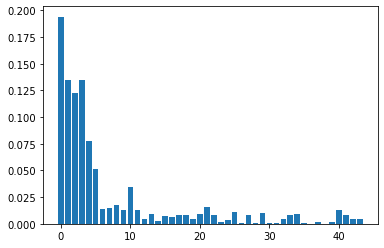

In [6]:
from matplotlib import pyplot
pyplot.bar(range(len(mdl.feature_importances_)), mdl.feature_importances_)
pyplot.show()

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 35380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30171 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 35380 missing from current font.
  font.set_te

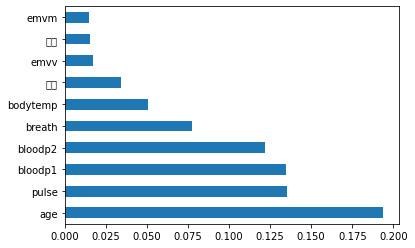

In [7]:
#plot graph of feature importances for better visualization
import matplotlib.pyplot as plt
feat_importances = pd.Series(mdl.feature_importances_, index=data_input.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# permutation based feature importance

In [16]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(mdl, x_test, y_test)
perm_importance

{'importances_mean': array([ 8.00972842e-02,  2.38346169e-02,  6.48561005e-04,  2.21321443e-02,
         1.71868666e-02,  8.10701257e-04,  8.91771382e-04,  2.51317390e-03,
         3.48601540e-03, -1.37819214e-03,  1.73490069e-02,  1.70247264e-03,
         8.10701257e-04,  4.29671666e-03,  8.10701257e-04, -8.91771382e-04,
         2.18889339e-03,  2.99959465e-03,  3.16173490e-03, -1.13498176e-03,
         3.24280503e-03,  5.99918930e-03,  4.37778679e-03,  0.00000000e+00,
         4.05350628e-04,  1.70247264e-03,  4.05350628e-04, -1.94568302e-03,
        -1.62140251e-04, -1.78354276e-03,  4.05350628e-04,  4.05350628e-04,
        -6.48561005e-04, -2.22044605e-17, -8.10701257e-05,  0.00000000e+00,
         0.00000000e+00, -7.29631131e-04,  0.00000000e+00,  8.10701257e-04,
         2.26996352e-03,  3.16173490e-03, -1.62140251e-04,  9.72841508e-04]),
 'importances_std': array([0.0026593 , 0.00426986, 0.00300725, 0.0039683 , 0.00137102,
        0.00209845, 0.00069739, 0.00118595, 0.00075181,

Text(0.5, 0, 'Permutation Importance')

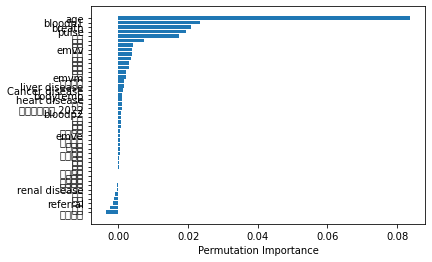

In [15]:
sorted_idx = perm_importance.importances_mean.argsort()
#feat_importances = data_input.columns[sorted_idx], perm_importance.importances_mean[sorted_idx]
#feat_importances.nlargest(10).plot(kind='barh')
plt.barh(data_input.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Feature importance by SHAP Values
- pip install shap

In [ ]:
import shap
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(x_test)

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, x_test)

# Analysis of the model
- Confusion matrix
- AUC-ROC curves

In [11]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.993
[[ 678    0    0    0    0]
 [   0 2322   30    0    1]
 [   0   14 7343    2    2]
 [   0    3   27 1053    0]
 [   0    0    7    0  853]]
Confusion matrix, without normalization


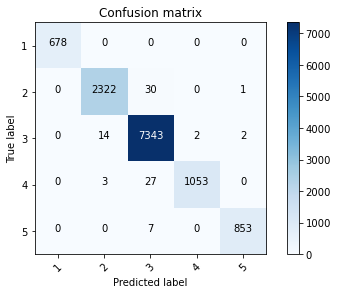

In [13]:
from sklearn import metrics
import itertools
import numpy as np

score = metrics.accuracy_score(data_output, y_pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(data_output, y_pred)
print(cm)
plot_confusion_matrix(cm, classes=['1', '2', '3', '4', '5'])

In [14]:
from sklearn.metrics import classification_report
target_names = ['1', '2', '3', '4', '5']
print(classification_report(data_output, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       678
           2       0.99      0.99      0.99      2353
           3       0.99      1.00      0.99      7361
           4       1.00      0.97      0.99      1083
           5       1.00      0.99      0.99       860

    accuracy                           0.99     12335
   macro avg       1.00      0.99      0.99     12335
weighted avg       0.99      0.99      0.99     12335



[[0.05       0.58       0.37       0.         0.        ]
 [0.03       0.04567857 0.89432143 0.03       0.        ]
 [0.01       0.12       0.87       0.         0.        ]
 ...
 [0.         0.07       0.72       0.2        0.01      ]
 [0.         0.03845238 0.82652381 0.13502381 0.        ]
 [0.02       0.72       0.25       0.01       0.        ]]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:998: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


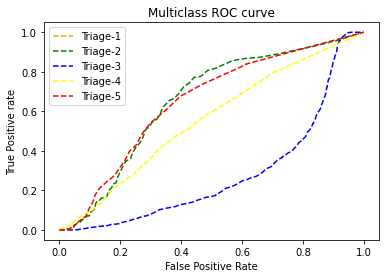

In [19]:
#train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.3, random_state=143)

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

#train the model
model=RandomForestClassifier()
model.fit(X_train, y_train)

#predicting the data
y_pred_cnb = model.predict(X_test)
y_prob_pred_cnb = model.predict_proba(X_test)

#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')
print(y_prob_pred_cnb)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Triage-1')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Triage-2')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Triage-3')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Triage-4')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Triage-5')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Random Forest Classifier ROC',dpi=300);    